# ArenaFlow 🎯 – YOLOv8 Crowd Detection from Video

This notebook uses YOLOv8 to detect and count people in each frame of a video.



In [6]:
!pip install ultralytics



✅ Video loaded successfully!
✅ Frame captured successfully!


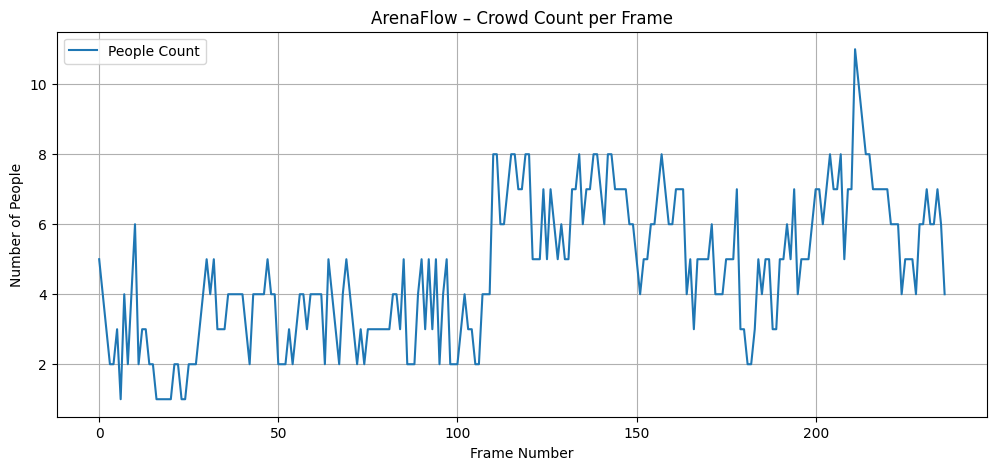

In [10]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# تحديد مسار الفيديو المرفوع
video_path = "/content/3687560-uhd_2160_3840_30fps.mp4"
cap = cv2.VideoCapture(video_path)

# ✅ التحقق من فتح الفيديو
if not cap.isOpened():
    print("❌ Failed to open video!")
else:
    print("✅ Video loaded successfully!")

# ✅ التحقق من إمكانية قراءة فريم واحد
ret, frame = cap.read()
if ret:
    print("✅ Frame captured successfully!")
else:
    print("❌ Couldn't read any frame from the video.")
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)  # نرجّع الفيديو لبدايته

# تحميل نموذج YOLOv8
model = YOLO("yolov8n.pt")

# القيم المراد تجميعها
frame_counts = []
frame_numbers = []

frame_num = 0

# ✅ بدء التحليل
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # كشف الأشخاص فقط (class 0)
    results = model.predict(source=frame, conf=0.5, classes=[0], verbose=False)
    person_count = len(results[0].boxes)

    frame_counts.append(person_count)
    frame_numbers.append(frame_num)
    frame_num += 1

cap.release()

# رسم النتائج
plt.figure(figsize=(12, 5))
plt.plot(frame_numbers, frame_counts, label='People Count')
plt.xlabel('Frame Number')
plt.ylabel('Number of People')
plt.title('ArenaFlow – Crowd Count per Frame')
plt.grid(True)
plt.legend()
plt.show()



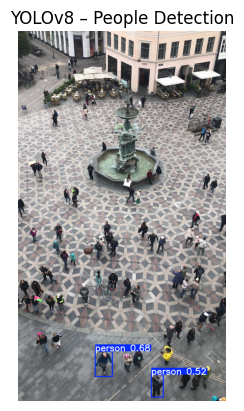

In [13]:
from IPython.display import display, clear_output
import time

# إعادة تشغيل الفيديو
cap = cv2.VideoCapture(video_path)
frame_num = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(source=frame, conf=0.5, classes=[0], verbose=False)
    annotated_frame = results[0].plot()

    # عرض داخل Colab
    clear_output(wait=True)
    display(plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)))
    plt.axis('off')
    plt.title("YOLOv8 – People Detection")
    plt.show()

    time.sleep(0.05)  # تأخير بسيط

    # ⏱️ نوقف بعد 100 فريم
    frame_num += 1
    if frame_num >= 100:
        break


In [14]:
import pandas as pd

df = pd.DataFrame({
    "frame": frame_numbers,
    "people_count": frame_counts
})

df.to_csv("crowd_counts.csv", index=False)
print("✅ Data saved to crowd_counts.csv")


✅ Data saved to crowd_counts.csv
